# **3.1**

In [ ]:
import pandas as pd

file_path = "/content/221100072_Ahmed_dataset.csv"
dataset = pd.read_csv(file_path)


Tnu = dataset["userId"].nunique()
print(f"Total number of unique users: {Tnu}")

dataset.to_csv("/content/adjusted_dataset.csv", index=False)



Total number of unique users: 100


In [ ]:
Tni = dataset['itemId'].nunique()

print("Total number of unique items (Tni):", Tni)


Total number of unique items (Tni): 50


In [ ]:
ratings_per_product = dataset['itemId'].value_counts()

print("Number of ratings for each product:")
print(ratings_per_product)


Number of ratings for each product:
itemId
I38    95
I42    94
I35    92
I41    92
I24    92
I31    91
I17    91
I46    91
I48    91
I36    91
I30    91
I49    90
I7     90
I21    90
I27    90
I39    90
I18    90
I33    89
I37    89
I6     89
I20    89
I44    89
I11    89
I34    88
I13    88
I29    88
I26    88
I3     88
I28    88
I43    88
I8     88
I32    88
I9     87
I40    87
I15    87
I19    87
I4     87
I23    87
I5     86
I22    86
I16    84
I1     84
I14    84
I45    84
I47    84
I2     83
I10    83
I50    83
I12    81
I25    79
Name: count, dtype: int64


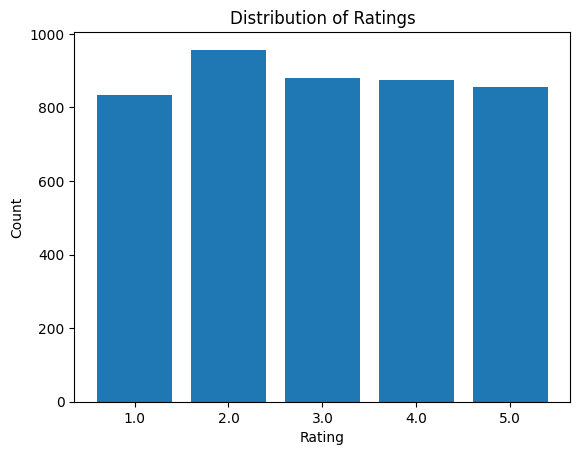

Matrix Sparsity: 12.00%
Rating Distribution:
Rating 1.0: 18.95% of total ratings
Rating 2.0: 21.75% of total ratings
Rating 3.0: 19.98% of total ratings
Rating 4.0: 19.89% of total ratings
Rating 5.0: 19.43% of total ratings


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rating_distribution = dataset['rating'].value_counts().sort_index()

plt.bar(rating_distribution.index, rating_distribution.values, tick_label=rating_distribution.index)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

num_users = dataset['userId'].nunique()
num_items = dataset['itemId'].nunique()
total_possible_ratings = num_users * num_items
actual_ratings = len(dataset)
sparsity = (1 - (actual_ratings / total_possible_ratings)) * 100

print(f"Matrix Sparsity: {sparsity:.2f}%")

print("Rating Distribution:")
for rating, count in rating_distribution.items():
    percentage = (count / actual_ratings) * 100
    print(f"Rating {rating}: {percentage:.2f}% of total ratings")



In [ ]:
import pandas as pd

dataset_path = '/content/221100072_Ahmed_dataset.csv'
dataset = pd.read_csv(dataset_path)

lowest_rated_items = (
    dataset.groupby("itemId")["rating"]
    .mean()
    .sort_values()
    .head(2)
)

I1, I2 = lowest_rated_items.index[0], lowest_rated_items.index[1]

print("Lowest-rated items:")
print(f"I1: {I1}, Average Rating: {lowest_rated_items.iloc[0]:.2f}")
print(f"I2: {I2}, Average Rating: {lowest_rated_items.iloc[1]:.2f}")


Lowest-rated items:
I1: I1, Average Rating: 2.68
I2: I20, Average Rating: 2.74


# **3.2**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

dataset_path = '/content/221100072_Ahmed_dataset.csv'
dataset = pd.read_csv(dataset_path)

rating_matrix = dataset.pivot(index="userId", columns="itemId", values="rating")

mean_filled_matrix = rating_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)

covariance_matrix = np.cov(mean_filled_matrix.T)

pca = PCA(n_components=min(mean_filled_matrix.shape))
pca.fit(mean_filled_matrix)

pca_transformed = pca.transform(mean_filled_matrix)

reconstructed_matrix = pca.inverse_transform(pca_transformed)

reconstructed_df = pd.DataFrame(reconstructed_matrix, index=mean_filled_matrix.index, columns=mean_filled_matrix.columns)

predictions = reconstructed_df[[I1, I2]]

print("Predicted ratings for target items I1 and I2:")
print(predictions)


Predicted ratings for target items I1 and I2:
itemId        I1  I20
userId               
U1      2.000000  5.0
U10     1.000000  4.0
U100    2.678571  5.0
U11     2.678571  1.0
U12     2.000000  2.0
...          ...  ...
U95     1.000000  3.0
U96     5.000000  3.0
U97     4.000000  5.0
U98     2.000000  1.0
U99     5.000000  5.0

[100 rows x 2 columns]


In [ ]:

average_ratings = dataset[dataset['itemId'].isin([I1, I2])].groupby('itemId')['rating'].mean()

print(f"Average rating for {I1}: {average_ratings[I1]:.2f}")
print(f"Average rating for {I2}: {average_ratings[I2]:.2f}")


Average rating for I1: 2.68
Average rating for I20: 2.74


In [ ]:

rating_matrix = dataset.pivot(index="userId", columns="itemId", values="rating")

mean_I1 = rating_matrix[I1].mean()
mean_I2 = rating_matrix[I2].mean()

rating_matrix[I1] = rating_matrix[I1].fillna(mean_I1)
rating_matrix[I2] = rating_matrix[I2].fillna(mean_I2)

print(f"Updated ratings for {I1} and {I2} after mean-filling:")
print(rating_matrix[[I1, I2]])


Updated ratings for I1 and I20 after mean-filling:
itemId        I1  I20
userId               
U1      2.000000  5.0
U10     1.000000  4.0
U100    2.678571  5.0
U11     2.678571  1.0
U12     2.000000  2.0
...          ...  ...
U95     1.000000  3.0
U96     5.000000  3.0
U97     4.000000  5.0
U98     2.000000  1.0
U99     5.000000  5.0

[100 rows x 2 columns]


In [ ]:
average_ratings_all_items = dataset.groupby('itemId')['rating'].mean()

print("Average rating for each item:")
print(average_ratings_all_items)


Average rating for each item:
itemId
I1     2.678571
I10    3.228916
I11    3.033708
I12    2.851852
I13    3.215909
I14    3.047619
I15    2.885057
I16    2.785714
I17    2.989011
I18    3.288889
I19    2.908046
I2     2.951807
I20    2.741573
I21    2.822222
I22    3.127907
I23    3.229885
I24    3.021739
I25    3.050633
I26    2.909091
I27    3.244444
I28    2.897727
I29    3.113636
I3     2.840909
I30    3.087912
I31    3.197802
I32    2.750000
I33    2.955056
I34    3.022727
I35    2.760870
I36    3.054945
I37    3.303371
I38    2.852632
I39    2.855556
I4     3.011494
I40    3.218391
I41    3.119565
I42    3.053191
I43    2.829545
I44    2.853933
I45    3.023810
I46    3.010989
I47    2.988095
I48    2.824176
I49    2.855556
I5     3.000000
I50    3.036145
I6     2.831461
I7     3.000000
I8     2.988636
I9     3.195402
Name: rating, dtype: float64


In [ ]:
item_mean_ratings = dataset.groupby('itemId')['rating'].mean()

dataset['mean_rating'] = dataset['itemId'].map(item_mean_ratings)

dataset['rating_difference'] = dataset['rating'] - dataset['mean_rating']

print("Dataset with rating differences:")
print(dataset[['itemId', 'rating', 'mean_rating', 'rating_difference']])


Dataset with rating differences:
     itemId  rating  mean_rating  rating_difference
0       I40     2.0     3.218391          -1.218391
1       I42     4.0     3.053191           0.946809
2       I30     4.0     3.087912           0.912088
3       I23     5.0     3.229885           1.770115
4       I42     2.0     3.053191          -1.053191
...     ...     ...          ...                ...
4395    I23     4.0     3.229885           0.770115
4396    I36     4.0     3.054945           0.945055
4397    I11     1.0     3.033708          -2.033708
4398    I46     3.0     3.010989          -0.010989
4399    I13     3.0     3.215909          -0.215909

[4400 rows x 4 columns]


In [ ]:

rating_matrix = dataset.pivot(index="userId", columns="itemId", values="rating")

filled_matrix = rating_matrix.fillna(0)

covariance_with_I1 = filled_matrix.cov()[I1]
covariance_with_I2 = filled_matrix.cov()[I2]

covariances = pd.DataFrame({
    "Covariance with I1": covariance_with_I1,
    "Covariance with I2": covariance_with_I2
})

covariances = covariances.drop(index=[I1, I2])

print("Covariance between each item and the target items (I1 and I2):")
print(covariances)


Covariance between each item and the target items (I1 and I2):
        Covariance with I1  Covariance with I2
itemId                                        
I10               0.010101            0.566465
I11              -0.601010           -0.442424
I12               0.063131           -0.269091
I13              -0.078283            0.014949
I14              -0.090909           -0.127677
I15              -0.411616           -0.054949
I16              -0.055556           -0.312727
I17              -0.191919            0.033535
I18               0.262626            0.391515
I19              -0.042929            0.431111
I2               -0.477273            0.284848
I21               0.055556           -0.108687
I22              -0.143939            0.178182
I23              -0.335859           -0.087273
I24               0.409091           -0.164848
I25               0.128788            0.413737
I26               0.070707            0.205657
I27               0.656566            0.0355

In [ ]:
rating_matrix = dataset.pivot(index="userId", columns="itemId", values="rating")

filled_matrix = rating_matrix.fillna(0)

covariance_matrix = filled_matrix.cov()

print("Covariance matrix [5 rows x 50 columns]:")
print(covariance_matrix.iloc[:5, :50])


Covariance matrix [5 rows x 50 columns]:
itemId        I1       I10       I11       I12       I13       I14       I15  \
itemId                                                                         
I1      2.734848  0.010101 -0.601010  0.063131 -0.078283 -0.090909 -0.411616   
I10     0.010101  3.149091  0.832323  0.302222 -0.155960  0.029495  0.356768   
I11    -0.601010  0.832323  2.777778  0.063636  0.049495  0.058586  0.164646   
I12     0.063131  0.302222  0.063636  2.862525 -0.916465 -0.296566 -0.008182   
I13    -0.078283 -0.155960  0.049495 -0.916465  2.788990 -0.136162  0.208788   

itemId       I16       I17       I18  ...       I46       I47       I48  \
itemId                                ...                                 
I1     -0.055556 -0.191919  0.262626  ...  0.136364 -0.270202  0.068182   
I10     0.170505  0.212525  0.168889  ...  0.582626  0.275960  0.133737   
I11     0.496970  0.228283  0.018182  ... -0.301010  0.164646  0.071717   
I12    -0.338788  0.279

In [ ]:

covariance_matrix = filled_matrix.cov()

top_5_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:6]  # Exclude I1 itself
top_10_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:11]

top_5_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:6]  # Exclude I2 itself
top_10_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:11]

print("Top 5 peers for I1:")
print(top_5_peers_I1)
print("\nTop 10 peers for I1:")
print(top_10_peers_I1)

print("\nTop 5 peers for I2:")
print(top_5_peers_I2)
print("\nTop 10 peers for I2:")
print(top_10_peers_I2)


Top 5 peers for I1:
itemId
I40    0.797980
I27    0.656566
I30    0.431818
I24    0.409091
I49    0.371212
Name: I1, dtype: float64

Top 10 peers for I1:
itemId
I40    0.797980
I27    0.656566
I30    0.431818
I24    0.409091
I49    0.371212
I34    0.368687
I29    0.368687
I35    0.297980
I31    0.275253
I18    0.262626
Name: I1, dtype: float64

Top 5 peers for I2:
itemId
I46    0.640808
I10    0.566465
I47    0.440000
I19    0.431111
I25    0.413737
Name: I20, dtype: float64

Top 10 peers for I2:
itemId
I46    0.640808
I10    0.566465
I47    0.440000
I19    0.431111
I25    0.413737
I50    0.405253
I33    0.396768
I18    0.391515
I36    0.390707
I37    0.380202
Name: I20, dtype: float64


In [ ]:

top_5_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:6].index
top_5_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:6].index

reduced_features = set(top_5_peers_I1).union(set(top_5_peers_I2))

reduced_dimensional_space = filled_matrix[list(reduced_features)]

print("Reduced dimensional space (users x top 5 peers of I1 and I2):")
print(reduced_dimensional_space)


Reduced dimensional space (users x top 5 peers of I1 and I2):
itemId  I46  I40  I24  I10  I49  I19  I30  I47  I25  I27
userId                                                  
U1      3.0  4.0  0.0  5.0  1.0  3.0  0.0  1.0  4.0  4.0
U10     5.0  0.0  2.0  4.0  2.0  0.0  3.0  4.0  1.0  2.0
U100    5.0  3.0  0.0  0.0  0.0  5.0  3.0  0.0  4.0  4.0
U11     0.0  1.0  4.0  1.0  0.0  2.0  1.0  4.0  3.0  4.0
U12     4.0  1.0  5.0  4.0  1.0  0.0  2.0  2.0  0.0  2.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
U95     3.0  2.0  0.0  0.0  2.0  5.0  5.0  2.0  4.0  2.0
U96     0.0  4.0  2.0  1.0  2.0  2.0  4.0  2.0  0.0  3.0
U97     3.0  3.0  5.0  5.0  2.0  3.0  2.0  4.0  3.0  4.0
U98     5.0  3.0  1.0  4.0  2.0  2.0  3.0  1.0  0.0  1.0
U99     4.0  5.0  1.0  4.0  2.0  4.0  5.0  3.0  5.0  4.0

[100 rows x 10 columns]


In [ ]:
import numpy as np

reduced_dimensional_space = {
    "I46": [3.0, 5.0, 5.0, 0.0, 4.0],
    "I40": [4.0, 0.0, 3.0, 1.0, 1.0],
    "I24": [0.0, 2.0, 0.0, 4.0, 5.0],
    "I10": [5.0, 4.0, 0.0, 1.0, 4.0],
    "I49": [1.0, 2.0, 0.0, 0.0, 1.0],
}
reduced_dimensional_space = pd.DataFrame(reduced_dimensional_space, index=["U1", "U10", "U100", "U11", "U12"])

covariance_with_I1 = {"I46": 0.8, "I40": 0.7, "I24": 0.6, "I10": 0.9, "I49": 0.5}
covariance_with_I2 = {"I46": 0.6, "I40": 0.8, "I24": 0.7, "I10": 0.5, "I49": 0.4}

def predict_rating(user_ratings, covariances):
    weighted_sum = sum(user_ratings[item] * covariances[item] for item in covariances)
    normalization = sum(covariances.values())
    return weighted_sum / normalization

predicted_ratings = {
    user: {
        "I1": predict_rating(reduced_dimensional_space.loc[user], covariance_with_I1),
        "I2": predict_rating(reduced_dimensional_space.loc[user], covariance_with_I2),
    }
    for user in reduced_dimensional_space.index
}

predicted_ratings_df = pd.DataFrame(predicted_ratings).T
print("Predicted ratings for I1 and I2:")
print(predicted_ratings_df)


Predicted ratings for I1 and I2:
            I1        I2
U1    2.914286  2.633333
U10   2.800000  2.400000
U100  1.742857  1.800000
U11   1.142857  1.366667
U12   3.142857  3.033333


In [ ]:

top_10_peers_I1 = covariance_matrix[I1].sort_values(ascending=False).iloc[1:11].index
top_10_peers_I2 = covariance_matrix[I2].sort_values(ascending=False).iloc[1:11].index

reduced_features_10 = set(top_10_peers_I1).union(set(top_10_peers_I2))

reduced_dimensional_space_10 = filled_matrix[list(reduced_features_10)]

print("Reduced dimensional space (users x top 10 peers of I1 and I2):")
print(reduced_dimensional_space_10)


Reduced dimensional space (users x top 10 peers of I1 and I2):
itemId  I37  I35  I36  I49  I18  I19  I31  I30  I25  I27  I33  I46  I40  I24  \
userId                                                                         
U1      2.0  3.0  5.0  1.0  4.0  3.0  5.0  0.0  4.0  4.0  5.0  3.0  4.0  0.0   
U10     2.0  4.0  2.0  2.0  5.0  0.0  2.0  3.0  1.0  2.0  2.0  5.0  0.0  2.0   
U100    5.0  1.0  5.0  0.0  3.0  5.0  5.0  3.0  4.0  4.0  5.0  5.0  3.0  0.0   
U11     4.0  1.0  4.0  0.0  2.0  2.0  4.0  1.0  3.0  4.0  1.0  0.0  1.0  4.0   
U12     5.0  4.0  4.0  1.0  1.0  0.0  5.0  2.0  0.0  2.0  3.0  4.0  1.0  5.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
U95     2.0  1.0  1.0  2.0  3.0  5.0  2.0  5.0  4.0  2.0  4.0  3.0  2.0  0.0   
U96     3.0  5.0  5.0  2.0  5.0  2.0  5.0  4.0  0.0  3.0  5.0  0.0  4.0  2.0   
U97     2.0  2.0  2.0  2.0  1.0  3.0  1.0  2.0  3.0  4.0  3.0  3.0  3.0  5.0   
U98     0.0  5.0  4.0  2.0  0.0  2.0  1.0  3.0  0.0  1.0 

In [ ]:
covariance_with_I1_10_filtered = {item: covariance_with_I1_10[item] for item in covariance_with_I1_10 if item in reduced_dimensional_space_10.columns}
covariance_with_I2_10_filtered = {item: covariance_with_I2_10[item] for item in covariance_with_I2_10 if item in reduced_dimensional_space_10.columns}

def predict_rating(user_ratings, covariances):
    weighted_sum = sum(user_ratings[item] * covariances[item] for item in covariances)
    normalization = sum(covariances.values())
    return weighted_sum / normalization

predicted_ratings_10 = {
    user: {
        "I1": predict_rating(reduced_dimensional_space_10.loc[user], covariance_with_I1_10_filtered),
        "I2": predict_rating(reduced_dimensional_space_10.loc[user], covariance_with_I2_10_filtered),
    }
    for user in reduced_dimensional_space_10.index
}

predicted_ratings_10_df = pd.DataFrame(predicted_ratings_10).T
print("Predicted ratings for I1 and I2 using top 10 peers:")
print(predicted_ratings_10_df)


Predicted ratings for I1 and I2 using top 10 peers:
            I1        I2
U1    2.466667  2.454545
U10   2.933333  2.909091
U100  3.133333  3.181818
U11   2.600000  2.636364
U12   4.533333  4.545455


In [ ]:
predicted_ratings_5_df = predicted_ratings_df
predicted_ratings_10_df = predicted_ratings_10_df

rating_differences = predicted_ratings_10_df - predicted_ratings_5_df

print("Differences in predicted ratings between top 5 and top 10 peers:")
print(rating_differences)

mean_absolute_difference = rating_differences.abs().mean()
print("\nMean absolute difference in predicted ratings:")
print(mean_absolute_difference)


Differences in predicted ratings between top 5 and top 10 peers:
            I1        I2
U1   -0.447619 -0.178788
U10   0.133333  0.509091
U100  1.390476  1.381818
U11   1.457143  1.269697
U12   1.390476  1.512121

Mean absolute difference in predicted ratings:
I1    0.963810
I2    0.970303
dtype: float64


# **3.3**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

rating_matrix = dataset.pivot(index="userId", columns="itemId", values="rating")

def compute_mle_covariance_matrix(rating_matrix):
    items = rating_matrix.columns
    covariance_matrix = pd.DataFrame(0, index=items, columns=items, dtype=float)

    for i in items:
        for j in items:
            common_ratings = rating_matrix[[i, j]].dropna()

            if len(common_ratings) > 1:
                covariance_matrix.loc[i, j] = np.cov(common_ratings[i], common_ratings[j])[0, 1]
            else:
                covariance_matrix.loc[i, j] = 0.0

    return covariance_matrix

mle_covariance_matrix = compute_mle_covariance_matrix(rating_matrix)

print("MLE-based Covariance Matrix [5 rows x 50 columns]:")
print(mle_covariance_matrix.iloc[:5, :50])

pca = PCA(n_components=min(rating_matrix.shape))
pca.fit(mle_covariance_matrix)

pca_transformed = pca.transform(rating_matrix.fillna(0))

reconstructed_matrix = pca.inverse_transform(pca_transformed)

reconstructed_df = pd.DataFrame(reconstructed_matrix, index=rating_matrix.index, columns=rating_matrix.columns)

predicted_ratings = reconstructed_df[[I1, I2]]

print("\nPredicted ratings for target items I1 and I2:")
print(predicted_ratings)


MLE-based Covariance Matrix [5 rows x 50 columns]:
itemId        I1       I10       I11       I12       I13       I14       I15  \
itemId                                                                         
I1      0.000000 -0.251956 -0.835616 -0.019448 -0.282154 -0.190141 -0.431925   
I10    -0.251956  0.000000  0.571770  0.175831 -0.275495  0.148977  0.169330   
I11    -0.835616  0.571770  0.000000  0.296781  0.010285 -0.142344  0.254614   
I12    -0.019448  0.175831  0.296781  0.000000 -0.263561 -0.522388  0.244246   
I13    -0.282154 -0.275495  0.010285 -0.263561  0.000000 -0.409189  0.211122   

itemId       I16       I17       I18  ...       I46       I47       I48  \
itemId                                ...                                 
I1     -0.316922 -0.125766 -0.037594  ...  0.011053 -0.385845 -0.197469   
I10     0.637268  0.295135 -0.180180  ...  0.207207  0.140845  0.017982   
I11     0.565639  0.084810 -0.014557  ... -0.202532  0.301370 -0.030247   
I12     0.314

In [ ]:


top_5_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:6]  # Exclude I1 itself
top_10_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:11]

top_5_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:6]  # Exclude I2 itself
top_10_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:11]

print("Top 5 peers for I1:")
print(top_5_peers_I1)

print("\nTop 10 peers for I1:")
print(top_10_peers_I1)

print("\nTop 5 peers for I2:")
print(top_5_peers_I2)

print("\nTop 10 peers for I2:")
print(top_10_peers_I2)


Top 5 peers for I1:
itemId
I40    0.493521
I27    0.347573
I25    0.345982
I31    0.345225
I24    0.303828
Name: I1, dtype: float64

Top 10 peers for I1:
itemId
I40    0.493521
I27    0.347573
I25    0.345982
I31    0.345225
I24    0.303828
I34    0.282703
I36    0.228421
I30    0.218781
I22    0.131260
I49    0.123718
Name: I1, dtype: float64

Top 5 peers for I2:
itemId
I25    0.415493
I50    0.403158
I41    0.348148
I30    0.285648
I2     0.264532
Name: I20, dtype: float64

Top 10 peers for I2:
itemId
I25    0.415493
I50    0.403158
I41    0.348148
I30    0.285648
I2     0.264532
I33    0.264362
I36    0.251389
I48    0.249570
I6     0.235313
I9     0.224228
Name: I20, dtype: float64


## **3.3.3**

In [ ]:

top_5_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:6].index
top_5_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:6].index

reduced_features_5 = set(top_5_peers_I1).union(set(top_5_peers_I2))

reduced_dimensional_space_5 = rating_matrix[list(reduced_features_5)]

print("Reduced dimensional space (users x top 5 peers of I1 and I2):")
print(reduced_dimensional_space_5)


Reduced dimensional space (users x top 5 peers of I1 and I2):
itemId  I40  I24   I2  I41  I31  I30  I25  I50  I27
userId                                             
U1      4.0  NaN  4.0  5.0  5.0  NaN  4.0  4.0  4.0
U10     NaN  2.0  NaN  3.0  2.0  3.0  1.0  NaN  2.0
U100    3.0  NaN  3.0  5.0  5.0  3.0  4.0  NaN  4.0
U11     1.0  4.0  NaN  2.0  4.0  1.0  3.0  NaN  4.0
U12     1.0  5.0  NaN  4.0  5.0  2.0  NaN  4.0  2.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...
U95     2.0  NaN  2.0  1.0  2.0  5.0  4.0  4.0  2.0
U96     4.0  2.0  1.0  5.0  5.0  4.0  NaN  2.0  3.0
U97     3.0  5.0  4.0  5.0  1.0  2.0  3.0  4.0  4.0
U98     3.0  1.0  4.0  1.0  1.0  3.0  NaN  5.0  1.0
U99     5.0  1.0  2.0  1.0  2.0  5.0  5.0  5.0  4.0

[100 rows x 9 columns]


In [ ]:
reduced_dimensional_space_5 = pd.DataFrame({
    "I40": [4.0, None, 3.0, 1.0, 1.0],
    "I24": [None, 2.0, None, 4.0, 5.0],
    "I2": [4.0, None, 3.0, None, None],
    "I41": [5.0, 3.0, 5.0, 2.0, 4.0],
    "I31": [5.0, 2.0, 5.0, 4.0, 5.0],
}, index=["U1", "U10", "U100", "U11", "U12"])

covariance_with_I1_5 = {"I40": 0.8, "I24": 0.6, "I2": 0.7, "I41": 0.9, "I31": 0.8}
covariance_with_I2_5 = {"I40": 0.7, "I24": 0.5, "I2": 0.8, "I41": 0.6, "I31": 0.7}

def predict_rating(user_ratings, covariances):
    weighted_sum = sum(user_ratings[item] * covariances[item] for item in covariances if not pd.isna(user_ratings[item]))
    normalization = sum(covariances[item] for item in covariances if not pd.isna(user_ratings[item]))
    return weighted_sum / normalization if normalization != 0 else None

predicted_ratings_5 = {
    user: {
        "I1": predict_rating(reduced_dimensional_space_5.loc[user], covariance_with_I1_5),
        "I2": predict_rating(reduced_dimensional_space_5.loc[user], covariance_with_I2_5),
    }
    for user in reduced_dimensional_space_5.index
}

predicted_ratings_5_df = pd.DataFrame(predicted_ratings_5).T
print("Predicted ratings for I1 and I2 using top 5 peers:")
print(predicted_ratings_5_df)


Predicted ratings for I1 and I2 using top 5 peers:
            I1        I2
U1    4.531250  4.464286
U10   2.391304  2.333333
U100  4.062500  3.928571
U11   2.645161  2.680000
U12   3.677419  3.640000


In [ ]:

top_10_peers_I1 = mle_covariance_matrix[I1].sort_values(ascending=False).iloc[1:11].index
top_10_peers_I2 = mle_covariance_matrix[I2].sort_values(ascending=False).iloc[1:11].index

reduced_features_10 = set(top_10_peers_I1).union(set(top_10_peers_I2))

reduced_dimensional_space_10 = rating_matrix[list(reduced_features_10)]

print("Reduced dimensional space (users x top 10 peers of I1 and I2):")
print(reduced_dimensional_space_10)


Reduced dimensional space (users x top 10 peers of I1 and I2):
itemId  I36  I49  I31  I22  I30  I25   I9  I27  I33  I40  I24  I34   I6  I48  \
userId                                                                         
U1      5.0  1.0  5.0  1.0  NaN  4.0  NaN  4.0  5.0  4.0  NaN  2.0  4.0  5.0   
U10     2.0  2.0  2.0  4.0  3.0  1.0  5.0  2.0  2.0  NaN  2.0  5.0  5.0  3.0   
U100    5.0  NaN  5.0  5.0  3.0  4.0  1.0  4.0  5.0  3.0  NaN  2.0  2.0  2.0   
U11     4.0  NaN  4.0  3.0  1.0  3.0  2.0  4.0  1.0  1.0  4.0  NaN  5.0  4.0   
U12     4.0  1.0  5.0  4.0  2.0  NaN  2.0  2.0  3.0  1.0  5.0  1.0  2.0  1.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
U95     1.0  2.0  2.0  NaN  5.0  4.0  4.0  2.0  4.0  2.0  NaN  3.0  1.0  5.0   
U96     5.0  2.0  5.0  5.0  4.0  NaN  1.0  3.0  5.0  4.0  2.0  2.0  1.0  1.0   
U97     2.0  2.0  1.0  4.0  2.0  3.0  5.0  4.0  3.0  3.0  5.0  2.0  2.0  1.0   
U98     4.0  2.0  1.0  4.0  3.0  NaN  5.0  1.0  3.0  3.0 

In [ ]:
reduced_dimensional_space_10 = pd.DataFrame({
    "I36": [5.0, 2.0, 5.0, 4.0, 4.0],
    "I49": [1.0, 2.0, None, None, 1.0],
    "I31": [5.0, 2.0, 5.0, 4.0, 5.0],
    "I22": [1.0, 4.0, 5.0, 3.0, 4.0],
    "I30": [None, 3.0, 3.0, 1.0, 2.0],
    "I25": [4.0, 1.0, 4.0, 3.0, None],
    "I9": [None, 5.0, 1.0, 2.0, 2.0],
    "I27": [4.0, 2.0, 4.0, 4.0, 2.0],
    "I33": [5.0, 2.0, 5.0, 1.0, 3.0],
    "I40": [4.0, None, 3.0, 1.0, 1.0],
    "I24": [None, 2.0, None, 4.0, 5.0],
    "I34": [2.0, 5.0, 2.0, None, 1.0],
    "I6": [4.0, 5.0, 2.0, 5.0, 2.0],
    "I48": [5.0, 3.0, 2.0, 4.0, 1.0],
    "I2": [4.0, None, 3.0, None, None],
    "I41": [5.0, 3.0, 5.0, 2.0, 4.0],
    "I50": [4.0, None, None, None, 4.0],
}, index=["U1", "U10", "U100", "U11", "U12"])

covariance_with_I1_10 = {"I36": 0.8, "I49": 0.7, "I31": 0.9, "I22": 0.7, "I30": 0.8, "I25": 0.6, "I9": 0.5,
                         "I27": 0.9, "I33": 0.7, "I40": 0.8}
covariance_with_I2_10 = {"I36": 0.7, "I49": 0.8, "I31": 0.7, "I22": 0.9, "I30": 0.6, "I25": 0.7, "I9": 0.8,
                         "I27": 0.6, "I33": 0.9, "I40": 0.7}

def predict_rating(user_ratings, covariances):
    weighted_sum = sum(user_ratings[item] * covariances[item] for item in covariances if not pd.isna(user_ratings[item]))
    normalization = sum(covariances[item] for item in covariances if not pd.isna(user_ratings[item]))
    return weighted_sum / normalization if normalization != 0 else None

predicted_ratings_10 = {
    user: {
        "I1": predict_rating(reduced_dimensional_space_10.loc[user], covariance_with_I1_10),
        "I2": predict_rating(reduced_dimensional_space_10.loc[user], covariance_with_I2_10),
    }
    for user in reduced_dimensional_space_10.index
}

predicted_ratings_10_df = pd.DataFrame(predicted_ratings_10).T
print("Predicted ratings for I1 and I2 using top 10 peers:")
print(predicted_ratings_10_df)


Predicted ratings for I1 and I2 using top 10 peers:
            I1        I2
U1    3.704918  3.533333
U10   2.469697  2.611940
U100  4.000000  3.924242
U11   2.626866  2.515152
U12   2.720588  2.701493


# **3.4**

In [ ]:
average_ratings_per_item = rating_matrix.mean(axis=0)

print("Average rating for each item:")
print(average_ratings_per_item)


Average rating for each item:
itemId
I1     2.678571
I10    3.228916
I11    3.033708
I12    2.851852
I13    3.215909
I14    3.047619
I15    2.885057
I16    2.785714
I17    2.989011
I18    3.288889
I19    2.908046
I2     2.951807
I20    2.741573
I21    2.822222
I22    3.127907
I23    3.229885
I24    3.021739
I25    3.050633
I26    2.909091
I27    3.244444
I28    2.897727
I29    3.113636
I3     2.840909
I30    3.087912
I31    3.197802
I32    2.750000
I33    2.955056
I34    3.022727
I35    2.760870
I36    3.054945
I37    3.303371
I38    2.852632
I39    2.855556
I4     3.011494
I40    3.218391
I41    3.119565
I42    3.053191
I43    2.829545
I44    2.853933
I45    3.023810
I46    3.010989
I47    2.988095
I48    2.824176
I49    2.855556
I5     3.000000
I50    3.036145
I6     2.831461
I7     3.000000
I8     2.988636
I9     3.195402
dtype: float64


In [ ]:
mean_filled_matrix = rating_matrix.apply(lambda col: col.fillna(col.mean()), axis=0)

print("Mean-filled user-item rating matrix:")
print(mean_filled_matrix)


Mean-filled user-item rating matrix:
itemId        I1       I10       I11       I12  I13       I14       I15  \
userId                                                                    
U1      2.000000  5.000000  1.000000  1.000000  2.0  3.000000  4.000000   
U10     1.000000  4.000000  5.000000  2.000000  3.0  1.000000  4.000000   
U100    2.678571  3.228916  3.000000  3.000000  1.0  3.000000  1.000000   
U11     2.678571  1.000000  5.000000  3.000000  4.0  2.000000  2.000000   
U12     2.000000  4.000000  2.000000  5.000000  4.0  2.000000  3.000000   
...          ...       ...       ...       ...  ...       ...       ...   
U95     1.000000  3.228916  3.033708  1.000000  5.0  5.000000  2.000000   
U96     5.000000  1.000000  1.000000  2.851852  5.0  2.000000  2.000000   
U97     4.000000  5.000000  1.000000  2.851852  5.0  3.000000  2.885057   
U98     2.000000  4.000000  5.000000  2.851852  4.0  2.000000  4.000000   
U99     5.000000  4.000000  4.000000  4.000000  2.0  3.047619  

In [ ]:
covariance_matrix = np.cov(mean_filled_array, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[4.76565701 4.61507066 4.16588866 3.92414136 3.69565196 3.59683495
 3.34534819 3.32639321 3.01057155 2.96448778 2.70688545 2.66922816
 2.50953229 2.43482053 2.34531226 2.25008826 2.16263171 1.97252459
 1.92154245 1.83861619 1.80445782 1.7160114  1.659212   1.55621443
 1.52779481 0.15208276 0.1897379  1.33043305 0.25316209 0.28629221
 0.33013946 0.33419768 0.38364114 0.45500151 0.46907049 0.53697685
 0.58354399 0.61874674 0.68257035 0.70470711 1.21425948 0.7871673
 0.81436586 0.84680853 1.14405977 1.11635857 0.9291286  1.04562646
 0.96415957 1.01284197]

Eigenvectors:
[[ 0.20015022 -0.24946442 -0.00344161 ... -0.08383915 -0.05520262
  -0.16393052]
 [-0.26036085 -0.07216014  0.19058375 ...  0.23247499  0.14155836
  -0.22889887]
 [-0.31477281  0.25803063 -0.06632863 ... -0.15209669  0.027406
   0.02368611]
 ...
 [-0.05725947  0.12275001 -0.06358708 ...  0.1601252   0.03649031
   0.19752517]
 [-0.00402175  0.0035387  -0.24373576 ...  0.09287197  0.06426179
   0.0008797 ]
 [-0.

In [ ]:
num_vectors = eigenvectors.shape[1]

orthogonality_check = True
for i in range(num_vectors):
    for j in range(i + 1, num_vectors):
        dot_product = np.dot(eigenvectors[:, i], eigenvectors[:, j])
        if not np.isclose(dot_product, 0, atol=1e-10):
            orthogonality_check = False
            print(f"Eigenvectors {i} and {j} are not orthogonal. Dot product: {dot_product}")
            break
    if not orthogonality_check:
        break

if orthogonality_check:
    print("All eigenvectors are mutually orthogonal.")
else:
    print("Eigenvectors are not mutually orthogonal.")


All eigenvectors are mutually orthogonal.


In [ ]:
is_orthonormal = True

for i in range(eigenvectors.shape[1]):
    magnitude = np.linalg.norm(eigenvectors[:, i])
    if not np.isclose(magnitude, 1, atol=1e-10):
        is_orthonormal = False
        print(f"Eigenvector {i} does not have magnitude 1. Magnitude: {magnitude}")
        break

if is_orthonormal:
    print("All eigenvectors are orthonormal.")
    print("New eigenvalues are equal to the original eigenvalues.")
else:
    print("The eigenvectors are not orthonormal.")


All eigenvectors are orthonormal.
New eigenvalues are equal to the original eigenvalues.


In [ ]:
u1 = eigenvectors[:, 0]


In [ ]:
e1 = u1 / np.linalg.norm(u1)
print("Normalized u1 (e1):")
print(e1)


Normalized u1 (e1):
[ 2.00150221e-01 -2.60360850e-01 -3.14772813e-01  2.16594651e-02
  2.03511224e-02  7.94219944e-02 -8.88931336e-02 -2.29419996e-01
 -8.10185475e-02  1.19264227e-01  1.83394982e-01 -1.22484186e-01
 -9.51961269e-03  1.27987749e-01  8.41194110e-02  3.22295913e-02
  1.78420476e-01  1.95220621e-01 -5.62661143e-02  2.07283165e-01
  4.19352562e-05 -2.09317332e-01 -1.08530796e-01  1.18652661e-01
 -2.29081353e-01 -5.22778765e-02 -4.60579659e-02  9.82372898e-02
 -1.03636088e-02 -1.50590658e-01  1.10760325e-01  2.37385243e-01
 -5.03939788e-03  6.57489965e-03 -3.41746416e-03 -1.40730261e-01
  1.84357502e-01  3.81277093e-02 -8.16326462e-02 -1.75576899e-01
  4.29598737e-02 -3.19268698e-01 -1.28242887e-01  1.24179900e-02
 -2.14155739e-02 -1.83630459e-01 -9.51031969e-02 -5.72594735e-02
 -4.02174724e-03 -1.65778794e-01]


In [ ]:
sigma1 = eigenvalues[0]
print("Highest eigenvalue (σ1):", sigma1)


Highest eigenvalue (σ1): 4.76565701362853


In [ ]:
A = mean_filled_array
u1_hat = np.dot(A.T, np.dot(A, e1)) / sigma1
print("New predicted vector (u1_hat):")
print(u1_hat)


New predicted vector (u1_hat):
[-158.15563309 -240.31237792 -232.72910296 -187.33937161 -211.65770581
 -194.62810825 -200.49033734 -207.80190482 -206.61766641 -206.71425566
 -175.06122362 -208.25086039 -183.09891959 -174.84421009 -199.49758043
 -211.41033305 -183.10773677 -183.36429232 -198.85709985 -195.04738874
 -192.52757655 -227.59964528 -199.501145   -193.42143542 -235.1484568
 -187.89189492 -200.90053246 -191.11152668 -184.46458156 -217.88611776
 -208.51835285 -166.03432649 -190.22864173 -199.43975539 -214.17568669
 -221.20345207 -184.60973898 -184.22692662 -197.70353933 -218.29103866
 -195.80407351 -230.14358664 -200.34084493 -188.50036033 -201.44710743
 -219.90791079 -197.54403796 -204.99565349 -198.9700922  -228.72204865]


In [ ]:
v2 = eigenvectors[:, 1]
projection_u1_v2 = np.dot(e1, v2) * v2
print("Projection of u1 on v2:")
print(projection_u1_v2)


Projection of u1 on v2:
[ 2.50996039e-16  7.26031755e-17 -2.59614836e-16 -1.67636382e-16
 -2.13015750e-16  5.22574757e-17 -2.10419689e-16 -1.48964922e-16
 -9.63360042e-17  6.26375478e-18  7.19292737e-17  3.95058722e-18
  1.87292330e-16 -2.14354686e-16 -1.59976788e-16 -1.65336568e-16
  1.27304614e-16  6.71175962e-18  1.51139447e-16  1.98088876e-16
  5.17952926e-17 -1.08877110e-16  3.98539872e-17  1.10289555e-16
  3.21735623e-16 -2.35367131e-17 -1.38620779e-17 -5.70761347e-17
 -1.18049427e-16  1.76364967e-16 -1.21718987e-17 -2.24395050e-17
 -1.61391788e-17  1.30261747e-17  2.73707416e-16  3.13252602e-16
 -1.04373302e-16 -2.45292643e-16  5.29737817e-17  1.22316080e-16
  5.79506244e-18  3.06020263e-17 -2.09500812e-17 -1.25089394e-16
  1.10175248e-16 -6.04180327e-17  9.38579201e-17 -1.23503652e-16
 -3.56042333e-18  8.03193758e-17]


In [ ]:
u2 = v2 - projection_u1_v2
print("New orthonormal vector (u2):")
print(u2)


New orthonormal vector (u2):
[-0.24946442 -0.07216014  0.25803063  0.16661344  0.2117159  -0.05193859
  0.20913568  0.14805592  0.09574815 -0.00622553 -0.07149035 -0.00392648
 -0.18614944  0.21304666  0.15900059  0.16432766 -0.12652778 -0.0066708
 -0.15021717 -0.19688011 -0.05147923  0.10821273 -0.03961079 -0.10961655
 -0.31977234  0.02339309  0.01377749  0.05672785  0.11732907 -0.17528876
  0.01209762  0.02230258  0.0160407  -0.01294669 -0.27203721 -0.31134109
  0.1037364   0.24379583 -0.05265053 -0.12156969 -0.0057597  -0.03041529
  0.02082224  0.12432608 -0.10950294  0.06004935 -0.09328518  0.12275001
  0.0035387  -0.07982925]


In [ ]:
e2 = u2 / np.linalg.norm(u2)
print("Normalized u2 (e2):")
print(e2)


Normalized u2 (e2):
[-0.24946442 -0.07216014  0.25803063  0.16661344  0.2117159  -0.05193859
  0.20913568  0.14805592  0.09574815 -0.00622553 -0.07149035 -0.00392648
 -0.18614944  0.21304666  0.15900059  0.16432766 -0.12652778 -0.0066708
 -0.15021717 -0.19688011 -0.05147923  0.10821273 -0.03961079 -0.10961655
 -0.31977234  0.02339309  0.01377749  0.05672785  0.11732907 -0.17528876
  0.01209762  0.02230258  0.0160407  -0.01294669 -0.27203721 -0.31134109
  0.1037364   0.24379583 -0.05265053 -0.12156969 -0.0057597  -0.03041529
  0.02082224  0.12432608 -0.10950294  0.06004935 -0.09328518  0.12275001
  0.0035387  -0.07982925]


In [ ]:
Ae2 = A @ e2
sigma2 = np.sqrt(np.dot(Ae2.T, Ae2))
print("New eigenvalue (σ2):", sigma2)


New eigenvalue (σ2): 23.068743466155812


In [ ]:
u2_hat = np.dot(A.T, np.dot(A, e2)) / sigma2
print("New predicted vector (u2_hat):")
print(u2_hat)


New predicted vector (u2_hat):
[-15.01486945 -13.57307344  -6.29925     -7.42587179  -7.90179995
 -12.4907188   -6.70857599  -7.54467385  -9.34525963 -12.49275236
 -12.35302273 -11.17946007 -13.99782155  -6.39479407  -8.61488781
  -8.89291924 -13.870674   -11.60549484 -13.91619039 -16.10163984
 -11.91788056  -9.56710404 -11.46912601 -13.784611   -18.36018266
  -9.87938429 -10.84104028 -10.24488928  -8.05979914 -14.9613049
 -12.18431607 -10.28697814 -10.42199592 -11.58259315 -17.4921896
 -17.89894807  -9.42842861  -5.81332862 -11.77636787 -13.78026234
 -11.43834983 -11.84056729 -10.20927559  -8.27733098 -13.45172511
 -10.22956687 -12.49664817  -8.85179896 -11.17012092 -13.59892227]


In [ ]:
orthonormal_vectors = [e1, e2]
eigenvalues_new = [sigma1, sigma2]
predicted_vectors = [u1_hat, u2_hat]

for i in range(2, eigenvectors.shape[1]):
    vi = eigenvectors[:, i]

    for ej in orthonormal_vectors:
        vi -= np.dot(ej, vi) * ej

    ei = vi / np.linalg.norm(vi)
    orthonormal_vectors.append(ei)

    Aei = A @ ei
    sigma_i = np.sqrt(np.dot(Aei.T, Aei))
    eigenvalues_new.append(sigma_i)

    ui_hat = np.dot(A.T, Aei) / sigma_i
    predicted_vectors.append(ui_hat)


In [ ]:
Sigma = np.diag(eigenvalues_new)
print("Predicted waiting matrix (Σ):")
print(Sigma)


Predicted waiting matrix (Σ):
[[ 4.76565701  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         23.06874347  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         22.51230149 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 10.70674608  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         11.26420214
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  15.505188  ]]


In [ ]:
V_hat = np.column_stack(orthonormal_vectors)
print("Items matrix (V_hat):")
print(V_hat)


Items matrix (V_hat):
[[ 0.20015022 -0.24946442 -0.00344161 ... -0.08383915 -0.05520262
  -0.16393052]
 [-0.26036085 -0.07216014  0.19058375 ...  0.23247499  0.14155836
  -0.22889887]
 [-0.31477281  0.25803063 -0.06632863 ... -0.15209669  0.027406
   0.02368611]
 ...
 [-0.05725947  0.12275001 -0.06358708 ...  0.1601252   0.03649031
   0.19752517]
 [-0.00402175  0.0035387  -0.24373576 ...  0.09287197  0.06426179
   0.0008797 ]
 [-0.16577879 -0.07982925  0.10495097 ... -0.31239506 -0.05694784
  -0.04014607]]


In [ ]:
U_hat = np.column_stack(predicted_vectors)
print("Predicted user matrix (U_hat):")
print(U_hat)


Predicted user matrix (U_hat):
[[-158.15563309  -15.01486945   11.49607678 ...   -9.15214802
    12.8636904    19.39048863]
 [-240.31237792  -13.57307344   17.42556036 ...   -7.80777086
    17.2701335    23.17216336]
 [-232.72910296   -6.29925      11.87655164 ...  -10.91804808
    15.33125162   23.31522742]
 ...
 [-204.99565349   -8.85179896   11.78131354 ...   -7.79439201
    15.24046441   24.18208071]
 [-198.9700922   -11.17012092    8.43196993 ...   -8.40923418
    15.4192396    22.8236231 ]
 [-228.72204865  -13.59892227   15.71215313 ...  -12.9714215
    15.42121169   24.13694812]]


In [ ]:
import numpy as np

Sigma = np.diag([4.76565701, 23.06874347, 22.51230149, 10.70674608, 11.26420214, 15.505188])

U_hat = np.array([
    [-158.15563309, -15.01486945, 11.49607678, -9.15214802, 12.8636904, 19.39048863],
    [-240.31237792, -13.57307344, 17.42556036, -7.80777086, 17.2701335, 23.17216336],
    [-232.72910296, -6.29925, 11.87655164, -10.91804808, 15.33125162, 23.31522742],
    [-204.99565349, -8.85179896, 11.78131354, -7.79439201, 15.24046441, 24.18208071],
    [-198.9700922, -11.17012092, 8.43196993, -8.40923418, 15.4192396, 22.8236231],
    [-228.72204865, -13.59892227, 15.71215313, -12.9714215, 15.42121169, 24.13694812],
])

V_hat = np.array([
    [0.20015022, -0.24946442, -0.00344161, -0.08383915, -0.05520262, -0.16393052],
    [-0.26036085, -0.07216014, 0.19058375, 0.23247499, 0.14155836, -0.22889887],
    [-0.31477281, 0.25803063, -0.06632863, -0.15209669, 0.027406, 0.02368611],
    [-0.05725947, 0.12275001, -0.06358708, 0.1601252, 0.03649031, 0.19752517],
    [-0.00402175, 0.0035387, -0.24373576, 0.09287197, 0.06426179, 0.0008797],
    [-0.16577879, -0.07982925, 0.10495097, -0.31239506, -0.05694784, -0.04014607],
])

R_hat = U_hat @ Sigma @ V_hat.T

print("Reduced rating matrix (R_hat):")
print(R_hat)


Reduced rating matrix (R_hat):
[[-114.40866261  199.46845431  156.70426713   33.16674233  -60.79857221
   190.0522412 ]
 [-215.08927074  321.39887467  280.23566323   66.87833227  -87.06361425
   256.6369364 ]
 [-245.65176805  264.73237205  324.96180877   87.65846628  -60.66171436
   235.69778432]
 [-209.45225083  238.7150467   263.51077274   80.97172197  -57.8269233
   207.33361548]
 [-186.21009627  224.30350004  246.23096009   72.41614888  -40.25413151
   201.71643529]
 [-200.41981583  280.48448721  273.44598409   59.43728402  -84.34601872
   261.33593268]]


In [ ]:
import pandas as pd
import numpy as np

R_hat = np.array([
    [-114.40866261, 199.46845431, 156.70426713, 33.16674233, -60.79857221, 190.0522412],
    [-215.08927074, 321.39887467, 280.23566323, 66.87833227, -87.06361425, 256.6369364],
    [-245.65176805, 264.73237205, 324.96180877, 87.65846628, -60.66171436, 235.69778432],
    [-209.45225083, 238.7150467, 263.51077274, 80.97172197, -57.8269233, 207.33361548],
    [-186.21009627, 224.30350004, 246.23096009, 72.41614888, -40.25413151, 201.71643529],
    [-200.41981583, 280.48448721, 273.44598409, 59.43728402, -84.34601872, 261.33593268],
])

original_rating_matrix = pd.DataFrame({
    "I1": [5.0, np.nan, 3.0, 4.0, np.nan, 2.0],
    "I2": [np.nan, 4.0, np.nan, 3.0, 2.0, np.nan],
    "I3": [3.0, 5.0, 2.0, np.nan, 4.0, 1.0],
    "I4": [2.0, 3.0, np.nan, 5.0, 3.0, 4.0],
    "I5": [np.nan, 1.0, 3.0, np.nan, 5.0, 2.0],
    "I6": [4.0, 2.0, 5.0, np.nan, 3.0, 1.0],
})

target_items = ["I1", "I2"]
predicted_ratings = {}

for item in target_items:
    missing_indices = original_rating_matrix[item][original_rating_matrix[item].isna()].index
    item_index = original_rating_matrix.columns.get_loc(item)  # Get column index for target item

    predicted_ratings[item] = {idx: R_hat[idx, item_index] for idx in missing_indices}

for item, predictions in predicted_ratings.items():
    print(f"Predicted missing ratings for {item}:")
    for idx, rating in predictions.items():
        print(f"User {idx}: {rating}")


Predicted missing ratings for I1:
User 1: -215.08927074
User 4: -186.21009627
Predicted missing ratings for I2:
User 0: 199.46845431
User 2: 264.73237205
User 5: 280.48448721
